In [1]:
import xarray as xr
import os
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import datetime as dt
import pandas as pd
import glob 

In [11]:
def com_plot(sfc_mod,obs_fil,var_mod,var_obs,worun_sfc,out_dir):
    obs_ds = xr.open_mfdataset(obs_fil)
    wo_mod = xr.open_dataset(worun_sfc).sel(time="2013")
    mod_ds = xr.open_dataset(sfc_mod).sel(time="2013")
    xx,yy = obs_ds.lon.values[0],obs_ds.lat.values
    for ii in range(len(yy)):
        new_mod = mod_ds[var_mod].sel(xh=slice(xx-0.1,xx+0.1),yq=slice(yy[ii]-0.1,yy[ii]+0.1)).mean(dim=["xh","yq"])
        worun_mod = wo_mod[var_mod].sel(xh=slice(xx-0.1,xx+0.1),yq=slice(yy[ii]-0.1,yy[ii]+0.1)).mean(dim=["xh","yq"])
        obs_dft = obs_ds[var_obs][:,0,ii,0].to_dataframe()[var_obs].reset_index()
        fin_time = mod_ds.time
        obs_time = obs_ds.time

        new_mod["time"] = new_mod.indexes['time'].to_datetimeindex()
        worun_mod['time'] = worun_mod.indexes['time'].to_datetimeindex()
        
        n_time = obs_dft["time"].dt.normalize()
        obs_dft = obs_dft.set_index(n_time)[var_obs]*0.01
        worun_dft = worun_mod.to_dataframe()
        wrun_dft = new_mod.to_dataframe().rename(columns={str(var_mod):"withrun_"+var_mod})
        dft3 = pd.concat([obs_dft,wrun_dft,worun_dft],axis=1)
        fig = plt.figure(figsize=(12,8))
        dft3.plot()
        plt.title("location lat:" + str(obs_ds.lat.values[ii])+" lon:"+str(obs_ds.lon.values[0]))
        #plt.savefig(out_dir+str(ii)+" "+var_mod+".png",dpi=250,bbox_inches='tight')
        display(dft3.corr())


In [4]:
sfc_mod = "/media/nma/hard1/vinay/archives/030222/20120101.ocean_sfc.nc"
obs_fil = glob.glob("/media/nma/hard1/vinay/archives/1213_720_run01/cur*")
worun_sf = "/media/nma/hard1/vinay/archives/1213_720_run01/20120101.ocean_sfc.nc"
out_dir = "/media/nma/hard1/vinay/archives/030222/"

ddd = xr.open_mfdataset(obs_fil)

ddd

<xarray.Dataset>
Dimensions:   (time: 364, depth: 1, lat: 5, lon: 1)
Coordinates:
  * time      (time) datetime64[ns] 2013-01-01T12:00:00 ... 2013-12-30T12:00:00
  * depth     (depth) float32 10.0
  * lat       (lat) float64 0.0 3.5 8.0 12.0 15.0
  * lon       (lon) float32 90.0
Data variables:
    U_320     (time, depth, lat, lon) float32 dask.array<chunksize=(364, 1, 1, 1), meta=np.ndarray>
    V_321     (time, depth, lat, lon) float32 dask.array<chunksize=(364, 1, 1, 1), meta=np.ndarray>
    CS_300    (time, depth, lat, lon) float32 dask.array<chunksize=(364, 1, 1, 1), meta=np.ndarray>
    CD_310    (time, depth, lat, lon) float32 dask.array<chunksize=(364, 1, 1, 1), meta=np.ndarray>
    QCS_5300  (time, depth, lat, lon) float32 dask.array<chunksize=(364, 1, 1, 1), meta=np.ndarray>
    QCD_5310  (time, depth, lat, lon) float32 dask.array<chunksize=(364, 1, 1, 1), meta=np.ndarray>
    SCS_6300  (time, depth, lat, lon) float32 dask.array<chunksize=(364, 1, 1, 1), meta=np.ndarray>
    CIC_7300  (time, depth, lat, lon) float32 dask.array<chunksize=(364, 1, 1, 1), meta=np.ndarray>
Attributes: (12/16)
    platform_code:                0n90e
    site_code:                    0n90e
    wmo_platform_code:            23004
    array:                        RAMA
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    ...                           ...
    iyhis:                        2013
    imhis:                        1
    idhis:                        1
    ihhis:                        12
    iminhis:                      0
    CREATION_DATE:                00:58 31-JAN-2022

/tmp/ipykernel_302877/329668780.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  new_mod["time"] = new_mod.indexes['time'].to_datetimeindex()
/tmp/ipykernel_302877/329668780.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  worun_mod['time'] = worun_mod.indexes['time'].to_datetimeindex()


,V_321,withrun_SSV,SSV
V_321,1.0,NaN,NaN
withrun_SSV,NaN,NaN,NaN
SSV,NaN,NaN,NaN


/tmp/ipykernel_302877/329668780.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  new_mod["time"] = new_mod.indexes['time'].to_datetimeindex()
/tmp/ipykernel_302877/329668780.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  worun_mod['time'] = worun_mod.indexes['time'].to_datetimeindex()


,V_321,withrun_SSV,SSV
V_321,1.0,NaN,NaN
withrun_SSV,NaN,NaN,NaN
SSV,NaN,NaN,NaN


/tmp/ipykernel_302877/329668780.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  new_mod["time"] = new_mod.indexes['time'].to_datetimeindex()
/tmp/ipykernel_302877/329668780.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  worun_mod['time'] = worun_mod.indexes['time'].to_datetimeindex()


,V_321,withrun_SSV,SSV
V_321,1.000000,0.281317,-0.184674
withrun_SSV,0.281317,1.000000,0.219669
SSV,-0.184674,0.219669,1.000000


/tmp/ipykernel_302877/329668780.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  new_mod["time"] = new_mod.indexes['time'].to_datetimeindex()
/tmp/ipykernel_302877/329668780.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  worun_mod['time'] = worun_mod.indexes['time'].to_datetimeindex()


,V_321,withrun_SSV,SSV
V_321,1.000000,0.874680,-0.111687
withrun_SSV,0.874680,1.000000,0.546945
SSV,-0.111687,0.546945,1.000000


/tmp/ipykernel_302877/329668780.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  new_mod["time"] = new_mod.indexes['time'].to_datetimeindex()
/tmp/ipykernel_302877/329668780.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  worun_mod['time'] = worun_mod.indexes['time'].to_datetimeindex()


,V_321,withrun_SSV,SSV
V_321,1.000000,0.135301,0.050775
withrun_SSV,0.135301,1.000000,-0.233649
SSV,0.050775,-0.233649,1.000000


<Figure size 864x576 with 0 Axes>

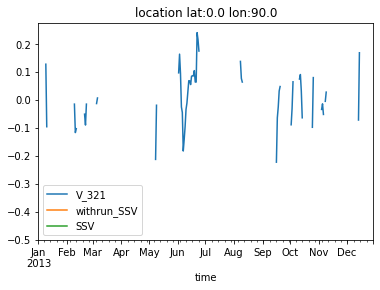

<Figure size 864x576 with 0 Axes>

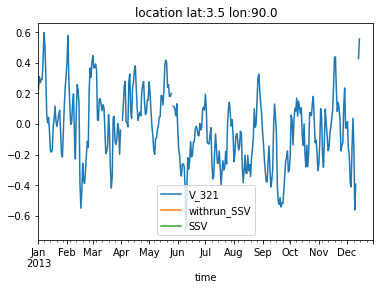

<Figure size 864x576 with 0 Axes>

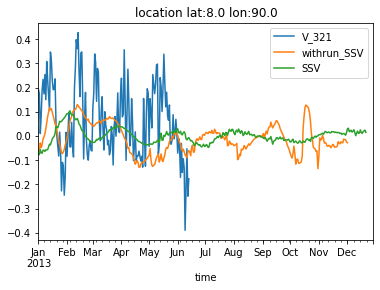

<Figure size 864x576 with 0 Axes>

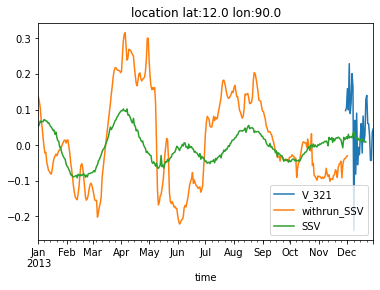

<Figure size 864x576 with 0 Axes>

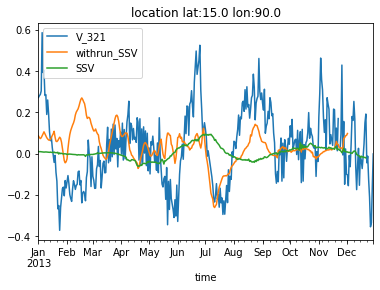

In [12]:
com_plot(sfc_mod,obs_fil,"SSV","V_321",worun_sf,out_dir)